In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
doc1="I am high"
doc2="Yes I am high"
doc3="I am kidding"

# TF-IDF means term frquency and inverse document frequency

# formula = log((1+no. of documents)/(1+document_freq(for t))

In [3]:
# less go om namo bhagwate vasudevay namah

In [4]:
import numpy as np

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('spam1.tsv',sep='\t')

In [7]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
ham=df[df['label']=='ham']

In [12]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [13]:
spam=df[df['label']=='spam']

In [14]:
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [15]:
spam.shape,ham.shape

((747, 4), (4825, 4))

In [16]:
ham=ham.sample(spam.shape[0])

In [17]:
ham.shape

(747, 4)

In [18]:
data = pd.concat([ham,spam])
# data.reset_index(input)
data.tail()


,label,message,length,punct
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8


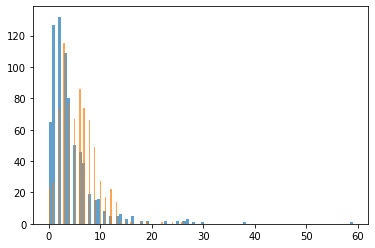

In [19]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

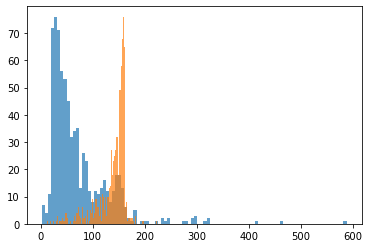

In [20]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

In [21]:
#data preparation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
data.head()

,label,message,length,punct
4306,ham,Yo come over carlos will be here soon,37,0
5517,ham,Miles and smiles r made frm same letters but d...,166,10
668,ham,This pay is &lt;DECIMAL&gt; lakhs:),37,6
3052,ham,Awesome question with a cute answer: Someone a...,131,14
3957,ham,Haha... dont be angry with yourself... Take it...,84,9


In [25]:
X_train,X_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True,stratify=data['label'])

In [26]:
y_train

2791    spam
5499     ham
1454     ham
2225     ham
3988    spam
        ... 
3463    spam
941      ham
4125     ham
2210     ham
3562    spam
Name: label, Length: 1045, dtype: object

In [27]:
#Less do bag of words

In [28]:
# vectorizer=TfidfTransformer()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [29]:
X_train=vectorizer.fit_transform(X_train)

In [30]:
X_train.shape

(1045, 3781)

In [31]:
X_test=vectorizer.fit_transform(X_test)

In [32]:
y_test=vectorizer.fit_transform(y_test)

In [33]:
# y_train=vectorizer.fit_transform(y_train)

In [34]:
clf=Pipeline([('tfidf',TfidfTransformer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [35]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [36]:
# y_pred = clf.predict(X_test)
X_test

<449x2240 sparse matrix of type '<class 'numpy.int64'>'
	with 7500 stored elements in Compressed Sparse Row format>

In [43]:
y_pred=clf.predict(X_test)

ValueError: X has 2240 features, but TfidfTransformer is expecting 3781 features as input.

In [41]:
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [449, 1045]